In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

### Клиенты телекоммуникационной компании 

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>


In [2]:
data = pd.read_csv('train.csv', index_col=0)
data.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [48]:
a = data[data.Tenure > 20]

len(a[a.Churn]), len(a[~a.Churn])

(301, 1795)

72

<AxesSubplot:>

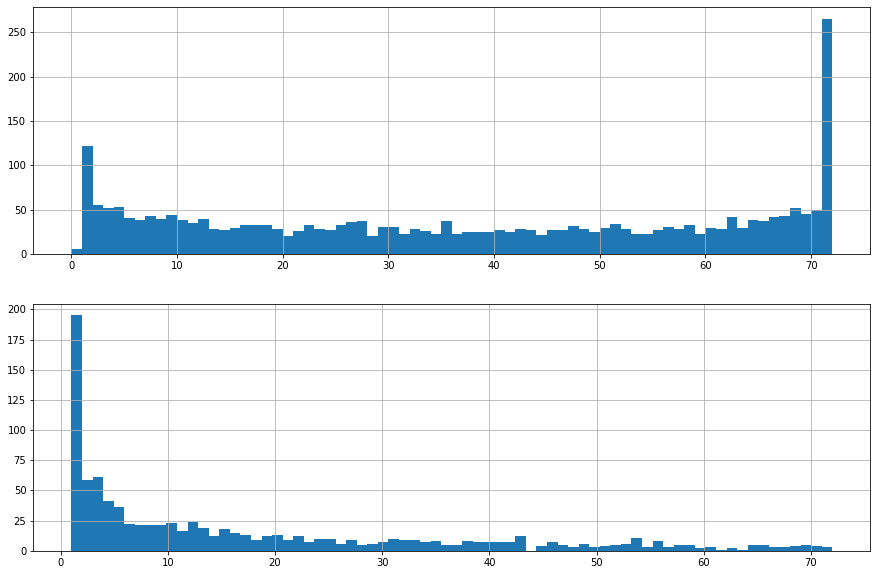

In [83]:
bins = data.Tenure.max()
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(15,10))

# гистограмма Tenure оставшихся
data[~data.Churn].Tenure.hist(bins=bins, ax=axs[0])

# гистограмма Tenure ушедших
data[data.Churn].Tenure.hist(bins=bins, ax=axs[1])

<AxesSubplot:>

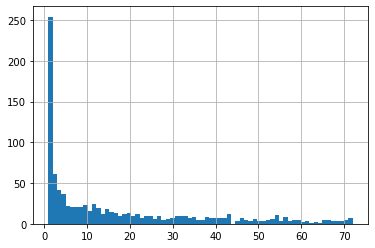

In [60]:
# гистограмма Tenure ушедших
data[data.Churn].Tenure.hist(bins=70)
# вывод: если ты не ушёл в первый год, то 

<AxesSubplot:>

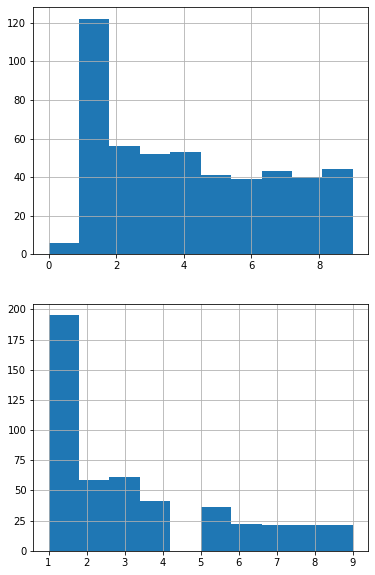

In [87]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(6,10))

# гистограмма Tenure оставшихся
data[(~data.Churn) & (data.Tenure < 10)].Tenure.hist(ax=axs[0])

# гистограмма Tenure ушедших
data[(data.Churn) & (data.Tenure < 10)].Tenure.hist(ax=axs[1])

In [104]:
good = data[(~data.Churn)]
bad = data[(data.Churn)]

print("     \t", "good", "\t", "bad")
print("0:   \t", len(good[good.Tenure == 0]), "\t", len(bad[bad.Tenure == 0]))
print("1:   \t", len(good[good.Tenure == 1]), "\t", len(bad[bad.Tenure == 1]))
print("2:   \t", len(good[good.Tenure == 2]), "\t", len(bad[bad.Tenure == 2]))
print("3:   \t", len(good[good.Tenure == 3]), "\t", len(bad[bad.Tenure == 3]))
print("3-60:\t", len(good[(3 < good.Tenure) & (good.Tenure <= 60)]), "\t", len(bad[(3 < bad.Tenure) & (bad.Tenure <= 60)]))
print(">60: \t", len(good[good.Tenure > 60]), "\t", len(bad[bad.Tenure > 60]))


print("")
print("total\t", len(good), len(bad))

     	 good 	 bad
0:   	 6 	 0
1:   	 122 	 195
2:   	 56 	 59
3:   	 52 	 61
3-60:	 1728 	 598
>60: 	 675 	 39

total	 2639 952


In [4]:
data[data.PaymentMethod == 'Mailed check']

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
7,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.65,74.9,True
21,Male,0,No,No,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.20,684.4,False
24,Male,0,Yes,Yes,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.50,290.55,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,Female,0,Yes,Yes,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,558.8,False
3569,Male,0,No,Yes,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,106.9,False
3574,Male,0,No,No,3,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,90.70,237.65,False


In [5]:
good = data[data['Churn'] == False]
bad = data[data['Churn'] == True]

In [6]:
interesting_columns = ['Gender', 'Senior', 'Married', 'Dependents', 'Tenure', 'Phone', 'MultiplePhones']
numeric_columns = []

In [7]:
# fig, ax = plt.subplots(figsize=(30,7))
# good[interesting_columns].plot(kind='bar', ax=ax)

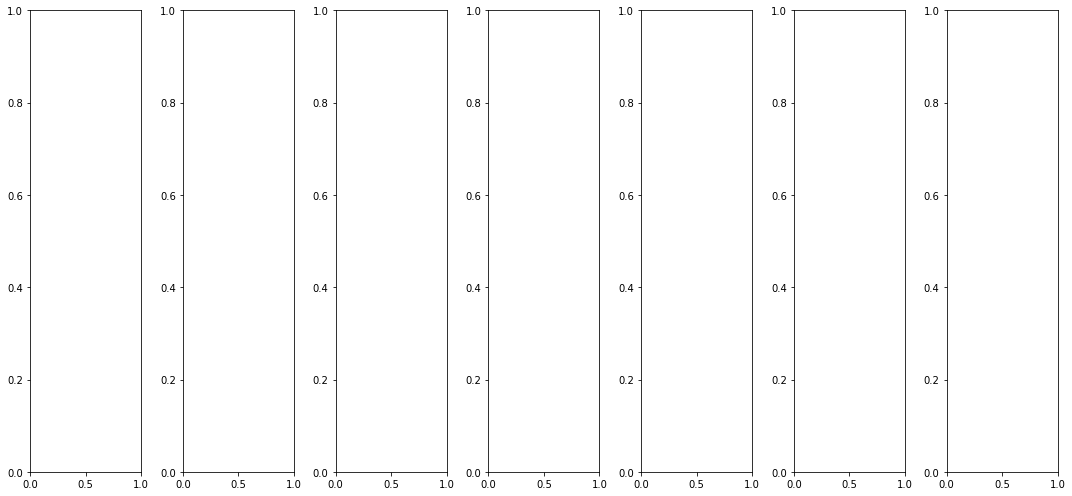

In [8]:
fig, axs = plt.subplots(ncols=len(interesting_columns), figsize=(15,7))
fig.tight_layout()
#for column, ax in zip(interesting_columns, axs):
#    sns.boxplot(ax=ax, data=good[[column]])

	 Не уходят 				 Уходят


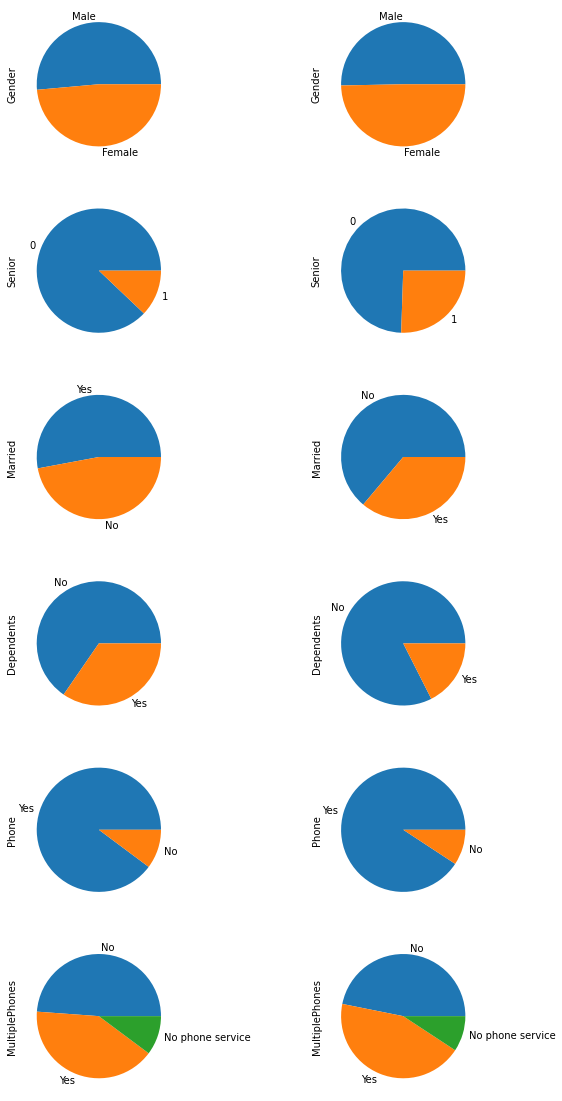

In [9]:
plot_columns = ['Gender', 'Senior', 'Married', 'Dependents', 'Phone', 'MultiplePhones']
fig, axs = plt.subplots(ncols=2, nrows=len(plot_columns), figsize=(10,20))

print("\t", "Не уходят", "\t\t\t\t", "Уходят")

for col, row in zip(plot_columns, axs):
    g, b = row
#     g_a = row[]
    
    good[col].value_counts().plot(kind='pie', ax=g, sort_columns=True) #, title=col + " good")
    bad[col].value_counts().plot(kind='pie', ax=b, sort_columns=True) #, title=col + " bad")


No handles with labels found to put in legend.


[[1357], [1282], [479], [473]]
['good Male', 'good not Male', 'bad Male', 'bad not Male']


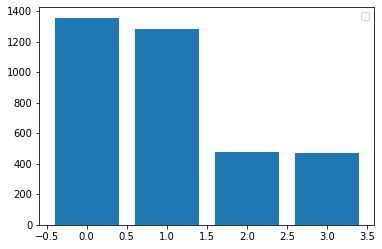

In [10]:
col = 'Gender'
tr = 'Male'


kek = [ [len(good[good[col] == tr])], [len(good[good[col] != tr]) ], 
       [len(bad[bad[col] == tr])], [ len(bad[bad[col] != tr]) ] ]

print(kek)
print([ "good " + tr, "good not " + tr, "bad " + tr, "bad not " + tr])

kekek = np.array(kek)
x = np.arange(kekek.shape[0])

fig, ax=plt.subplots()

for i in range(kekek.shape[1]):
    bottom=np.sum(kekek[:,0:i], axis=1)  
    ax.bar(x,kekek[:,i], bottom=bottom) #, label=labels[i])

plt.legend(framealpha=1)
plt.show()

# Мучжины имеют бОльшую тенденцию оставаться

In [11]:
set(data['Senior'])

{0, 1}

No handles with labels found to put in legend.


['good 1', 'good not 1', 'bad 1', 'bad not 1']


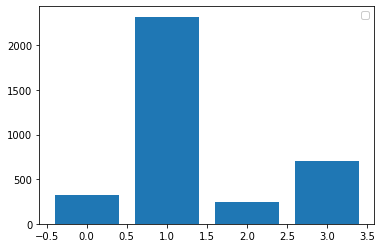

In [12]:
col = 'Senior'
tr = 1

kek = [ [len(good[good[col] == tr])], [len(good[good[col] != tr]) ], 
       [len(bad[bad[col] == tr])], [ len(bad[bad[col] != tr]) ] ]

print([ "good " + str(tr), "good not " + str(tr), "bad " + str(tr), "bad not " + str(tr)])

kekek = np.array(kek)
x = np.arange(kekek.shape[0])

fig, ax=plt.subplots()

for i in range(kekek.shape[1]):
    bottom=np.sum(kekek[:,0:i], axis=1)  
    ax.bar(x,kekek[:,i], bottom=bottom)

plt.legend(framealpha=1)
plt.show()

# Молодёжь имеет тенденцию бОльшую тенденцию оставаться

No handles with labels found to put in legend.


['good Yes', 'good not Yes', 'bad Yes', 'bad not Yes']


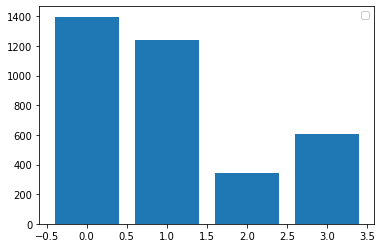

In [13]:
col = 'Married'
tr = "Yes"

kek = [ [len(good[good[col] == tr])], [len(good[good[col] != tr]) ], 
       [len(bad[bad[col] == tr])], [ len(bad[bad[col] != tr]) ] ]

print([ "good " + str(tr), "good not " + str(tr), "bad " + str(tr), "bad not " + str(tr)])

kekek = np.array(kek)
x = np.arange(kekek.shape[0])

fig, ax=plt.subplots()

for i in range(kekek.shape[1]):
    bottom=np.sum(kekek[:,0:i], axis=1)  
    ax.bar(x,kekek[:,i], bottom=bottom)

plt.legend(framealpha=1)
plt.show()

# Женатые имеют бОльшую тенденцию оставаться

['good Yes', 'good not Yes', 'bad Yes', 'bad not Yes']


No handles with labels found to put in legend.


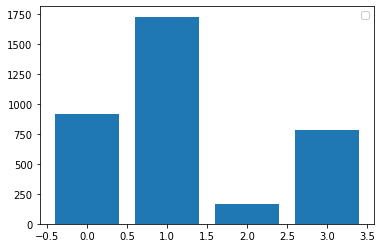

In [14]:
col = 'Dependents'
tr = "Yes"

kek = [ [len(good[good[col] == tr])], [len(good[good[col] != tr]) ], 
       [len(bad[bad[col] == tr])], [ len(bad[bad[col] != tr]) ] ]

print([ "good " + str(tr), "good not " + str(tr), "bad " + str(tr), "bad not " + str(tr)])

kekek = np.array(kek)
x = np.arange(kekek.shape[0])

fig, ax=plt.subplots()

for i in range(kekek.shape[1]):
    bottom=np.sum(kekek[:,0:i], axis=1)  
    ax.bar(x,kekek[:,i], bottom=bottom)

plt.legend(framealpha=1)
plt.show()

# Детные имеют бОльшую тенденцию оставаться

No handles with labels found to put in legend.


['good Yes', 'good not Yes', 'bad Yes', 'bad not Yes']


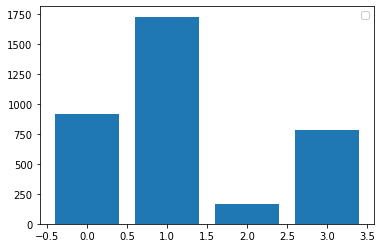

In [15]:
col = 'Dependents'
tr = "Yes"

kek = [ [len(good[good[col] == tr])], [len(good[good[col] != tr]) ], 
       [len(bad[bad[col] == tr])], [ len(bad[bad[col] != tr]) ] ]

print([ "good " + str(tr), "good not " + str(tr), "bad " + str(tr), "bad not " + str(tr)])

kekek = np.array(kek)
x = np.arange(kekek.shape[0])

fig, ax=plt.subplots()

for i in range(kekek.shape[1]):
    bottom=np.sum(kekek[:,0:i], axis=1)  
    ax.bar(x,kekek[:,i], bottom=bottom)

plt.legend(framealpha=1)
plt.show()

# Детные имеют бОльшую тенденцию оставаться

	 Не уходят 				 Уходят


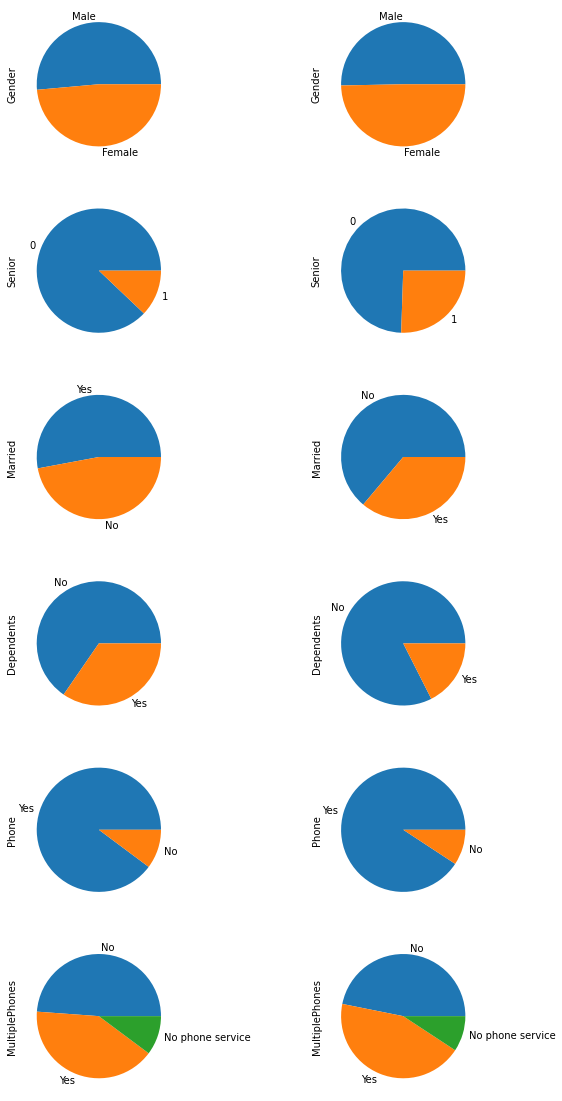

In [16]:
plot_columns = ['Gender', 'Senior', 'Married', 'Dependents', 'Phone', 'MultiplePhones']
fig, axs = plt.subplots(ncols=2, nrows=len(plot_columns), figsize=(10,20))

print("\t", "Не уходят", "\t\t\t\t", "Уходят")

for col, row in zip(plot_columns, axs):
    g, b = row
    good[col].value_counts().plot(kind='pie', ax=g, sort_columns=True) #, title=col + " good")
    bad[col].value_counts().plot(kind='pie', ax=b, sort_columns=True) #, title=col + " bad")


<AxesSubplot:title={'center':'MultiplePhones good'}, ylabel='Gender'>

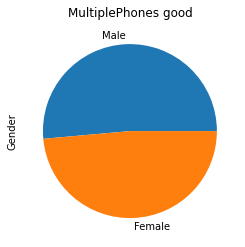

In [17]:
good['Gender'].value_counts().plot(kind='pie', title=col + " good")

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
1302,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,False
1436,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,False
1486,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,False
2578,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,False
3037,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,False
3247,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,False


In [146]:
# data[(data.Tenure == 1) & (data.Married == 'No') & (data.Dependents == 'No') & (data.Phone == 'No') & (data.Internet == 'DSL') & (data.Security == 'No') & (data.EBilling == 'Yes') & (data.MonthlyCharges == 20.25)]
data[(data.Tenure == 1)  & (data.EBilling == 'No') & (data.MonthlyCharges == 20.25)]

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
641,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,20.25,False
3535,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,20.25,True


In [139]:
pd.set_option('display.max_rows', None)
data.groupby(['Tenure', 'Married', 'Dependents', 'Phone', 'Internet', 'Security', 'MonthlyCharges'])['Churn'].apply(lambda x: np.unique(x, return_counts=True)).reset_index()


,Tenure,Married,Dependents,Phone,Internet,Security,MonthlyCharges,Churn
0,0,No,Yes,Yes,No,No internet service,20.25,"([False], [1])"
1,0,Yes,Yes,No,DSL,Yes,52.55,"([False], [1])"
2,0,Yes,Yes,No,DSL,Yes,56.05,"([False], [1])"
3,0,Yes,Yes,Yes,DSL,Yes,80.85,"([False], [1])"
4,0,Yes,Yes,Yes,No,No internet service,19.70,"([False], [1])"
5,0,Yes,Yes,Yes,No,No internet service,25.35,"([False], [1])"
6,1,No,No,No,DSL,No,24.25,"([True], [1])"
7,1,No,No,No,DSL,No,24.40,"([False], [3])"
8,1,No,No,No,DSL,No,24.45,"([True], [1])"
9,1,No,No,No,DSL,No,24.60,"([True], [1])"
